In [ ]:
pip install mlrose-hiive

     |████████████████████████████████| 49 kB 3.5 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=b86522e9ea21fd57dfab62058c8d86eb4b12c4062fc4ffe8d7bbb13f2abf8c1e
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [ ]:
import mlrose_hiive
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time
import timeit

# Define the problem: 4 Peaks

In [ ]:
# define fitness
fitness = mlrose_hiive.FourPeaks(t_pct=0.10)

# Define optimization problem object with different sizes
problem1 = mlrose_hiive.DiscreteOpt(length=8, fitness_fn=fitness, maximize=True)
problem2 = mlrose_hiive.DiscreteOpt(length=16, fitness_fn=fitness, maximize=True)
problem3 = mlrose_hiive.DiscreteOpt(length=32, fitness_fn=fitness, maximize=True)

# Try Different Sizes

In [ ]:
def plot_fitness_curve(curve, problem, title):
  array_len = len(curve)
  x = np.arange(1, array_len+1, 1)
  y = curve[:,0]
  plt.title(title)
  plt.plot(x,y)
  plt.xlabel("Iteration")
  plt.ylabel("Fitness score")
  plt.show

## Random Hill Climb

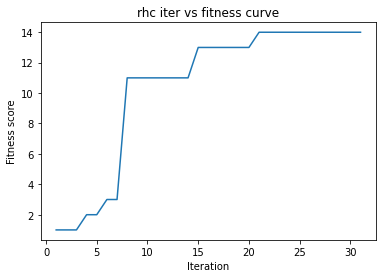

In [ ]:
best_state_rhc1, best_fitness_rhc1, curve_rhc1 = mlrose_hiive.random_hill_climb(problem1, 
                                                                             #schedule=schedule, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "rhc iter vs fitness curve"
plot_fitness_curve(curve_rhc1,problem1,title)

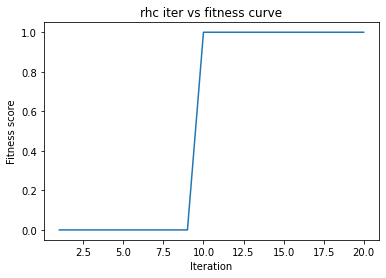

In [ ]:
best_state_rhc2, best_fitness_rhc2, curve_rhc2 = mlrose_hiive.random_hill_climb(problem2, 
                                                                             #schedule=schedule, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "rhc iter vs fitness curve"
plot_fitness_curve(curve_rhc2,problem2,title)

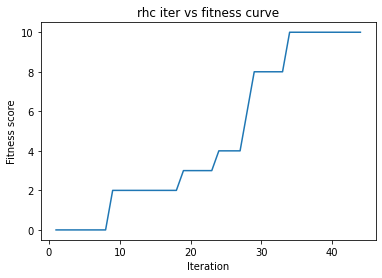

In [ ]:
best_state_rhc3, best_fitness_rhc3, curve_rhc3 = mlrose_hiive.random_hill_climb(problem3, 
                                                                             #schedule=schedule, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "rhc iter vs fitness curve"
plot_fitness_curve(curve_rhc3,problem3,title)

<function matplotlib.pyplot.show>

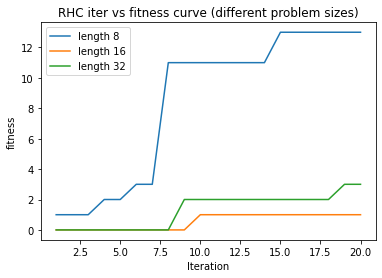

In [ ]:
plt.figure()
x = np.arange(1, 21)
plt.plot(x,curve_rhc1[:,0][:20], label = "length 8")
plt.plot(x,curve_rhc2[:,0][:20], label = "length 16")
plt.plot(x,curve_rhc3[:,0][:20], label = "length 32")
plt.title("RHC iter vs fitness curve (different problem sizes)")
#plt.title('RHC')
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

## Simulated Annealing

In [ ]:
schedule = mlrose_hiive.ExpDecay()

49


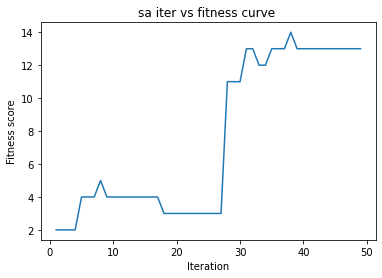

In [ ]:
best_state_sa1, best_fitness_sa1, curve_sa1 = mlrose_hiive.simulated_annealing(problem1, 
                                                                             schedule=schedule, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "sa iter vs fitness curve "
plot_fitness_curve(curve_sa1,problem1,title)
print(len(curve_sa1[:,0]))

72


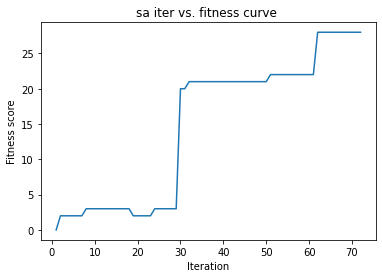

In [ ]:
best_state_sa2, best_fitness_sa2, curve_sa2 = mlrose_hiive.simulated_annealing(problem2, 
                                                                             schedule=schedule, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "sa iter vs. fitness curve "
plot_fitness_curve(curve_sa2,problem2,title)
print(len(curve_sa2[:,0]))

218


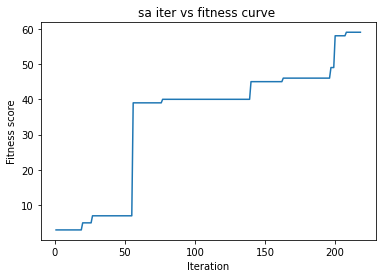

In [ ]:
best_state_sa3, best_fitness_sa3, curve_sa3 = mlrose_hiive.simulated_annealing(problem3, 
                                                                             schedule=schedule, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "sa iter vs fitness curve "
plot_fitness_curve(curve_sa3,problem1,title)
print(len(curve_sa3[:,0]))

<function matplotlib.pyplot.show>

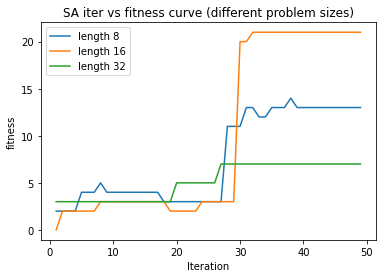

In [ ]:
plt.figure()
x = np.arange(1, 50)
plt.plot(x,curve_sa1[:,0][:49], label = "length 8")
plt.plot(x,curve_sa2[:,0][:49], label = "length 16")
plt.plot(x,curve_sa3[:,0][:49], label = "length 32")
plt.title("SA iter vs fitness curve (different problem sizes)")
#plt.title('RHC')
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

## Genetic Algorithm

11


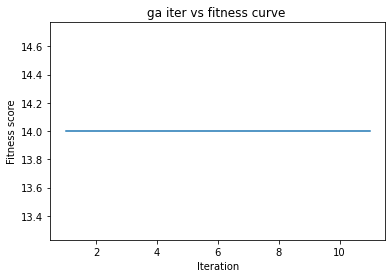

In [ ]:
best_state_ga1, best_fitness_ga1, curve_ga1 = mlrose_hiive.genetic_alg(problem1, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "ga iter vs fitness curve "
plot_fitness_curve(curve_ga1,problem1,title)
print(len(curve_ga1[:,0]))

15


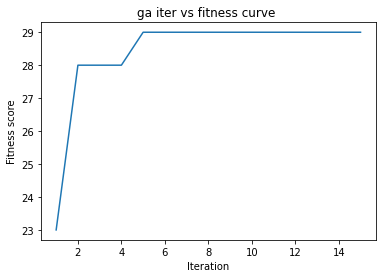

In [ ]:
best_state_ga2, best_fitness_ga2, curve_ga2 = mlrose_hiive.genetic_alg(problem2, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "ga iter vs fitness curve "
plot_fitness_curve(curve_ga2,problem2,title)
print(len(curve_ga2[:,0]))

20


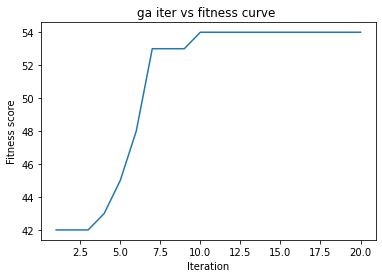

In [ ]:
best_state_ga3, best_fitness_ga3, curve_ga3 = mlrose_hiive.genetic_alg(problem3, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "ga iter vs fitness curve "
plot_fitness_curve(curve_ga3,problem3,title)
print(len(curve_ga3[:,0]))

<function matplotlib.pyplot.show>

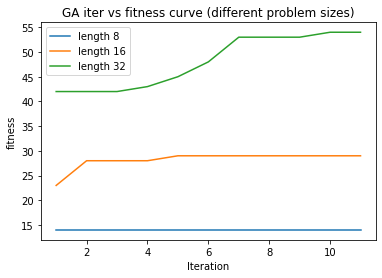

In [ ]:
plt.figure()
x = np.arange(1, 12)
plt.plot(x,curve_ga1[:,0][:11], label = "length 8")
plt.plot(x,curve_ga2[:,0][:11], label = "length 16")
plt.plot(x,curve_ga3[:,0][:11], label = "length 32")
plt.title("GA iter vs fitness curve (different problem sizes)")
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

## MIMIC

11


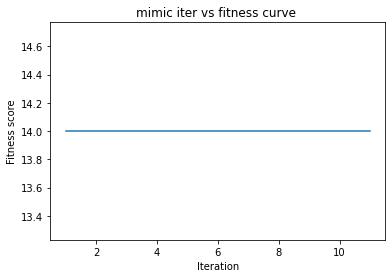

In [ ]:
best_state_mimic1, best_fitness_mimic1, curve_mimic1 = mlrose_hiive.mimic(problem1, 
                                                                             max_iters=1000,
                                                                             curve=True)
title = "mimic iter vs fitness curve "
plot_fitness_curve(curve_mimic1,problem1,title)
print(len(curve_mimic1[:,0]))

17


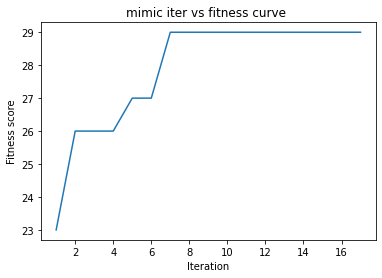

In [ ]:
best_state_mimic2, best_fitness_mimic2, curve_mimic2 = mlrose_hiive.mimic(problem2, 
                                                                          max_iters=1000,
                                                                          curve=True)
title = "mimic iter vs fitness curve "
plot_fitness_curve(curve_mimic2,problem2,title)
print(len(curve_mimic2[:,0]))

18


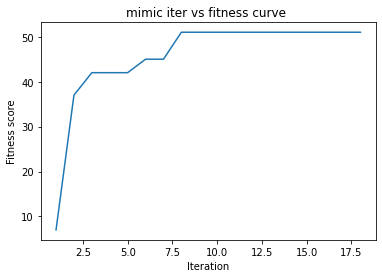

In [ ]:
best_state_mimic3, best_fitness_mimic3, curve_mimic3 = mlrose_hiive.mimic(problem3, 
                                                                          max_iters=1000,
                                                                          curve=True)
title = "mimic iter vs fitness curve "
plot_fitness_curve(curve_mimic3,problem3,title)
print(len(curve_mimic3[:,0]))

<function matplotlib.pyplot.show>

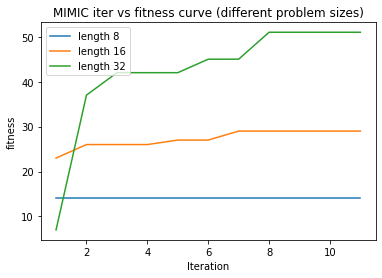

In [ ]:
plt.figure()
x = np.arange(1, 12)
plt.plot(x,curve_mimic1[:,0][:11], label = "length 8")
plt.plot(x,curve_mimic2[:,0][:11], label = "length 16")
plt.plot(x,curve_mimic3[:,0][:11], label = "length 32")
plt.title("MIMIC iter vs fitness curve (different problem sizes)")
#plt.title('RHC')
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

# Apply Different Algorithms

## Random Hill Climb


### Parameter tuning

<function matplotlib.pyplot.show>

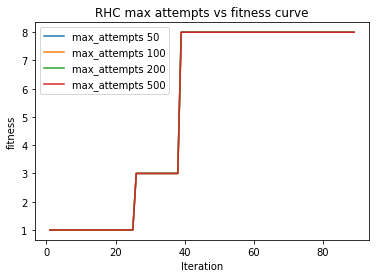

In [ ]:
max_iters = 1000
start = timeit.default_timer()
best_state_rhc_maxAttemp1, best_fitness_rhc_maxAttemp1, rhc_curve_maxAttemp1 = mlrose_hiive.random_hill_climb(problem3, 
                                                                             max_attempts = 50, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             random_state=7)
best_state_rhc_maxAttemp2, best_fitness_rhc_maxAttemp2, rhc_curve_maxAttemp2 = mlrose_hiive.random_hill_climb(problem3, 
                                                                             max_attempts = 100, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             random_state=7)
best_state_rhc_maxAttemp3, best_fitness_rhc_maxAttemp3, rhc_curve_maxAttemp3 = mlrose_hiive.random_hill_climb(problem3, 
                                                                             max_attempts = 200, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             random_state=7)
best_state_rhc_maxAttemp4, best_fitness_rhc_maxAttemp4, rhc_curve_maxAttemp4 = mlrose_hiive.random_hill_climb(problem3, 
                                                                             max_attempts = 500, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             random_state=7)



plt.figure()
x = np.arange(1, 90)
plt.plot(x,rhc_curve_maxAttemp1[:,0][:89], label = "max_attempts 50")
plt.plot(x,rhc_curve_maxAttemp2[:,0][:89], label = "max_attempts 100")
plt.plot(x,rhc_curve_maxAttemp3[:,0][:89], label = "max_attempts 200")
plt.plot(x,rhc_curve_maxAttemp4[:,0][:89], label = "max_attempts 500")
plt.title("RHC max attempts vs fitness curve")
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

### Build model

Best Fitness: 32.0, Wall time: 0.027880171000106202s
Best Fitness: 32.0, Wall time: 0.021811507000165875s
Best Fitness: 32.0, Wall time: 0.017423488000531506s
Best Fitness: 32.0, Wall time: 0.015001666999523877s
Best Fitness: 32.0, Wall time: 0.013912383999922895s


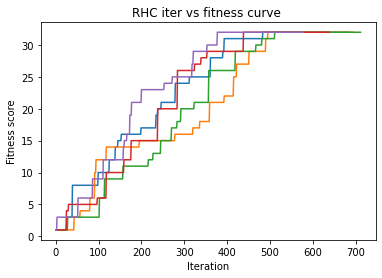

In [ ]:
seedsList = [7, 0, 1111111, 100, 88888888]
max_iters = 1000
max_attempts = 200
for sd in seedsList:
  start = timeit.default_timer()
  best_state_rhc, best_fitness_rhc, rhc_curve = mlrose_hiive.random_hill_climb(problem3, 
                                                                             max_attempts = max_attempts, 
                                                                             max_iters=max_iters, 
                                                                             restarts=0, 
                                                                             curve=True, 
                                                                             init_state = None, 
                                                                             random_state=sd)
  end = timeit.default_timer()
  print(f'Best Fitness: {best_fitness_rhc}, Wall time: {end-start}s')
  title = "RHC iter vs fitness curve "
  plot_fitness_curve(rhc_curve,problem1,title)

In [ ]:
aveTime = (0.030187812000349368 + 0.017940626999916276 + 0.018099246000019775 + 0.01594373599982646 + 0.02999638200026311)/5
print("RHC average converge time = "+ str(aveTime))
aveScore = (32.0 + 32.0 + 32.0 + 32.0 + 32.0)/5
print("RHC average fitness score = "+ str(aveScore))

RHC average converge time = 0.022433560600075
RHC average fitness score = 32.0


## Simulated Annealing

### Parameter tuning

<function matplotlib.pyplot.show>

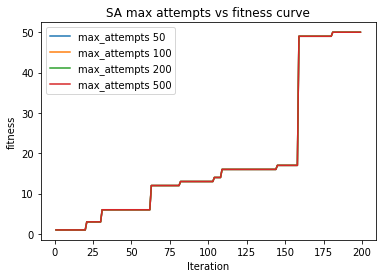

In [ ]:
max_iters = 1000
best_state_sa_maxAttemp1, best_fitness_sa_maxAttemp1, sa_curve_maxAttemp1 = mlrose_hiive.simulated_annealing(problem3, 
                                                                             max_attempts = 50, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             #schedule = schedule,
                                                                             random_state= 7)
best_state_sa_maxAttemp2, best_fitness_sa_maxAttemp2, sa_curve_maxAttemp2 = mlrose_hiive.simulated_annealing(problem3, 
                                                                             max_attempts = 100, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             #schedule = schedule,
                                                                             random_state= 7)
best_state_sa_maxAttemp3, best_fitness_sa_maxAttemp3, sa_curve_maxAttemp3 = mlrose_hiive.simulated_annealing(problem3, 
                                                                             max_attempts = 200, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             #schedule = schedule,
                                                                             random_state= 7)
best_state_sa_maxAttemp4, best_fitness_sa_maxAttemp4, sa_curve_maxAttemp4 = mlrose_hiive.simulated_annealing(problem3, 
                                                                             max_attempts = 500, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             #schedule = schedule,
                                                                             random_state= 7)

plt.figure()
x = np.arange(1, 200)
plt.plot(x,sa_curve_maxAttemp1[:,0][:199], label = "max_attempts 50")
plt.plot(x,sa_curve_maxAttemp2[:,0][:199], label = "max_attempts 100")
plt.plot(x,sa_curve_maxAttemp3[:,0][:199], label = "max_attempts 200")
plt.plot(x,sa_curve_maxAttemp4[:,0][:199], label = "max_attempts 500")
plt.title("SA max attempts vs fitness curve")
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

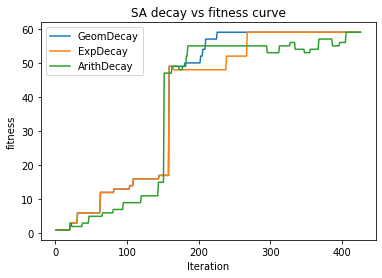

In [ ]:
max_iters = 1000
schedule1 = mlrose_hiive.GeomDecay()
schedule2 = mlrose_hiive.ExpDecay()
schedule3 = mlrose_hiive.ArithDecay()
best_state_sa_schedule1, best_fitness_sa_schedule1, sa_curve_schedule1 = mlrose_hiive.simulated_annealing(problem3, 
                                                                             max_attempts = 200, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             schedule = schedule1,
                                                                             random_state= 7)
best_state_sa_schedule2, best_fitness_sa_schedule2, sa_curve_schedule2 = mlrose_hiive.simulated_annealing(problem3, 
                                                                             max_attempts = 200, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             schedule = schedule2,
                                                                             random_state= 7)
best_state_sa_schedule3, best_fitness_sa_schedule3, sa_curve_schedule3 = mlrose_hiive.simulated_annealing(problem3, 
                                                                             max_attempts = 200, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             schedule = schedule3,
                                                                             random_state= 7)

plt.figure()
x = np.arange(1, 427)
plt.plot(x,sa_curve_schedule1[:,0][:426], label = "GeomDecay")
plt.plot(x,sa_curve_schedule2[:,0][:426], label = "ExpDecay")
plt.plot(x,sa_curve_schedule3[:,0][:426], label = "ArithDecay")
plt.title("SA decay vs fitness curve")
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

### Build model

Best Fitness: 59.0, Wall time: 0.030120802000055846s
Best Fitness: 59.0, Wall time: 0.01646845499999472s
Best Fitness: 32.0, Wall time: 0.01427180100017722s
Best Fitness: 59.0, Wall time: 0.023667573000238917s
Best Fitness: 59.0, Wall time: 0.03112777099977393s


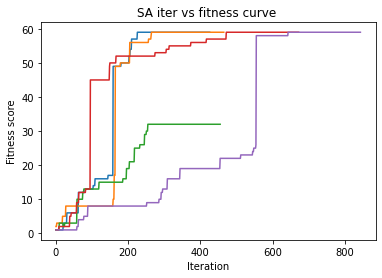

In [ ]:
schedule = mlrose_hiive.GeomDecay()
seedsList = [7, 0, 1111111, 100, 88888888]
max_iters = 1000
max_attempts = 200
for sd in seedsList:
  start = timeit.default_timer()
  best_state_sa, best_fitness_sa, sa_curve = mlrose_hiive.simulated_annealing(problem3, 
                                                                             max_attempts = max_attempts, 
                                                                             max_iters=max_iters, 
                                                                             #restarts=0, 
                                                                             curve=True, 
                                                                             schedule = schedule,
                                                                             init_state = None, 
                                                                             random_state= sd)
  end = timeit.default_timer()
  print(f'Best Fitness: {best_fitness_sa}, Wall time: {end-start}s')
  title = "SA iter vs fitness curve "
  plot_fitness_curve(sa_curve,problem1,title)

In [ ]:
aveTime = (0.030120802000055846 + 0.01646845499999472 + 0.01427180100017722 + 0.023667573000238917 + 0.03112777099977393)/5
print("SA average converge time = "+ str(aveTime))
aveScore = (59.0 + 59.0 + 32.0 + 59.0 + 59.0)/5
print("SA average fitness score = "+ str(aveScore))

SA average converge time = 0.023131280400048127
SA average fitness score = 53.6


## Genetic Algorithm

### Parameter tuning

<function matplotlib.pyplot.show>

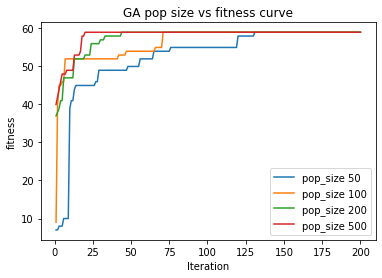

In [ ]:
max_iters = 1000
max_attempts = 200
start = timeit.default_timer()
best_state_ga_pop1, best_fitness_ga_pop1, ga_curve_pop1 = mlrose_hiive.genetic_alg(problem3, 
                                                                      max_attempts = max_attempts, 
                                                                      max_iters=max_iters, 
                                                                      pop_size = 50,
                                                                      curve=True, 
                                                                      random_state= 0)
best_state_ga_pop2, best_fitness_ga_pop2, ga_curve_pop2 = mlrose_hiive.genetic_alg(problem3, 
                                                                      max_attempts = max_attempts, 
                                                                      max_iters=max_iters, 
                                                                      pop_size = 100,
                                                                      curve=True, 
                                                                      random_state= 0)
best_state_ga_pop3, best_fitness_ga_pop3, ga_curve_pop3 = mlrose_hiive.genetic_alg(problem3, 
                                                                      max_attempts = max_attempts, 
                                                                      max_iters=max_iters, 
                                                                      pop_size = 200,
                                                                      curve=True, 
                                                                      random_state= 0)
best_state_ga_pop4, best_fitness_ga_pop4, ga_curve_pop4 = mlrose_hiive.genetic_alg(problem3, 
                                                                      max_attempts = max_attempts, 
                                                                      max_iters=max_iters, 
                                                                      pop_size = 500,
                                                                      curve=True, 
                                                                      random_state= 0)

plt.figure()
x = np.arange(1, 201)
plt.plot(x,ga_curve_pop1[:,0][:200], label = "pop_size 50")
plt.plot(x,ga_curve_pop2[:,0][:200], label = "pop_size 100")
plt.plot(x,ga_curve_pop3[:,0][:200], label = "pop_size 200")
plt.plot(x,ga_curve_pop4[:,0][:200], label = "pop_size 500")
plt.title("GA pop size vs fitness curve")
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

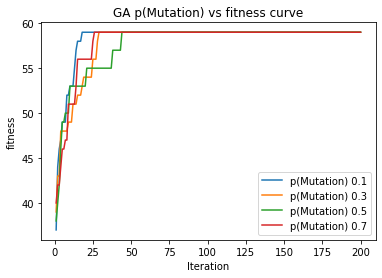

In [ ]:
max_iters = 1000
max_attempts = 200
best_state_ga_mut1, best_fitness_ga_mut1, ga_curve_mut1 = mlrose_hiive.genetic_alg(problem3, 
                                                                      max_attempts = max_attempts, 
                                                                      max_iters=max_iters, 
                                                                      pop_size = 500,
                                                                      curve=True, 
                                                                      mutation_prob=0.1,
                                                                      random_state= 0)
best_state_ga_mut2, best_fitness_ga_mut2, ga_curve_mut2 = mlrose_hiive.genetic_alg(problem3, 
                                                                      max_attempts = max_attempts, 
                                                                      max_iters=max_iters, 
                                                                      pop_size = 500,
                                                                      curve=True,
                                                                      mutation_prob=0.3, 
                                                                      random_state= 0)
best_state_ga_mut3, best_fitness_ga_mut3, ga_curve_mut3 = mlrose_hiive.genetic_alg(problem3, 
                                                                      max_attempts = max_attempts, 
                                                                      max_iters=max_iters, 
                                                                      pop_size = 500,
                                                                      curve=True, 
                                                                      mutation_prob=0.5,
                                                                      random_state= 0)
best_state_ga_mut4, best_fitness_ga_mut4, ga_curve_mut4 = mlrose_hiive.genetic_alg(problem3, 
                                                                      max_attempts = max_attempts, 
                                                                      max_iters=max_iters, 
                                                                      pop_size = 500,
                                                                      curve=True, 
                                                                      mutation_prob=0.7,
                                                                      random_state= 0)

plt.figure()
x = np.arange(1, 201)
plt.plot(x,ga_curve_mut1[:,0][:200], label = "p(Mutation) 0.1")
plt.plot(x,ga_curve_mut2[:,0][:200], label = "p(Mutation) 0.3")
plt.plot(x,ga_curve_mut3[:,0][:200], label = "p(Mutation) 0.5")
plt.plot(x,ga_curve_mut4[:,0][:200], label = "p(Mutation) 0.7")
plt.title("GA p(Mutation) vs fitness curve")
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

### Build model

Best Fitness: 59.0, Wall time: 8.981200942000214s
Best Fitness: 59.0, Wall time: 9.0850653159996s
Best Fitness: 59.0, Wall time: 9.548397231000308s
Best Fitness: 59.0, Wall time: 9.926067775000774s
Best Fitness: 59.0, Wall time: 9.248191233999933s


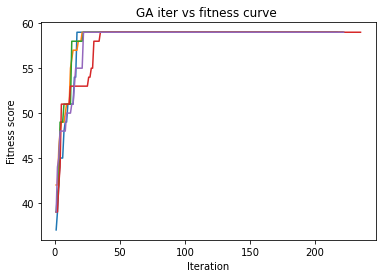

In [ ]:
seedsList = [7, 0, 1111111, 100, 88888888]
max_iters = 1000
max_attempts = 200
for sd in seedsList:
  start = timeit.default_timer()
  best_state_ga, best_fitness_ga, ga_curve = mlrose_hiive.genetic_alg(problem3, 
                                                                             max_attempts = max_attempts, 
                                                                             max_iters=max_iters, 
                                                                             curve=True, 
                                                                             mutation_prob = 0.1, 
                                                                             pop_size = 500,
                                                                             random_state= sd)
  end = timeit.default_timer()
  print(f'Best Fitness: {best_fitness_ga}, Wall time: {end-start}s')
  title = "GA iter vs fitness curve "
  plot_fitness_curve(ga_curve,problem1,title)

In [ ]:
aveTime = (8.981200942000214 + 9.0850653159996 + 9.548397231000308 + 9.926067775000774 + 9.248191233999933)/5
print("GA average converge time = "+ str(aveTime))
aveScore = (59.0 + 59.0 + 59.0 + 59.0 + 59.0)/5
print("GA average fitness score = "+ str(aveScore))

GA average converge time = 9.357784499600166
GA average fitness score = 59.0


## MIMIC

### Parameter tuning

<function matplotlib.pyplot.show>

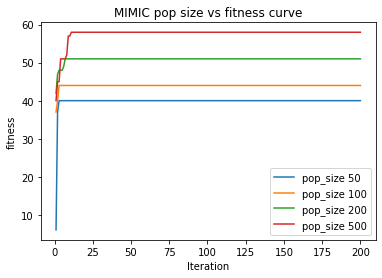

In [ ]:
max_iters = 1000
max_attempts = 200
best_state_mimic_pop1, best_fitness_mimic_pop1, mimic_curve_pop1 = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 50,
                                                                curve=True, 
                                                                random_state= 7)
best_state_mimic_pop2, best_fitness_mimic_pop2, mimic_curve_pop2 = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 100,
                                                                curve=True, 
                                                                random_state= 7)
best_state_mimic_pop3, best_fitness_mimic_pop3, mimic_curve_pop3 = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 200,
                                                                curve=True, 
                                                                random_state= 7)
best_state_mimic_pop4, best_fitness_mimic_pop4, mimic_curve_pop4 = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 500,
                                                                curve=True, 
                                                                random_state= 7)


plt.figure()
x = np.arange(1, 201)
plt.plot(x,mimic_curve_pop1[:,0][:200], label = "pop_size 50")
plt.plot(x,mimic_curve_pop2[:,0][:200], label = "pop_size 100")
plt.plot(x,mimic_curve_pop3[:,0][:200], label = "pop_size 200")
plt.plot(x,mimic_curve_pop4[:,0][:200], label = "pop_size 500")
plt.title("MIMIC pop size vs fitness curve")
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

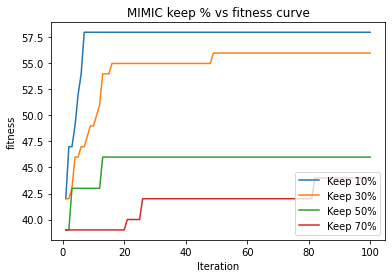

In [ ]:
max_iters = 1000
max_attempts = 200
best_state_mimic_keep1, best_fitness_mimic_keep1, mimic_curve_keep1 = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 500,
                                                                curve=True, 
                                                                keep_pct=0.1,
                                                                random_state= 7)
best_state_mimic_keep2, best_fitness_mimic_keep2, mimic_curve_keep2 = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 500,
                                                                curve=True, 
                                                                keep_pct=0.3,
                                                                random_state= 7)
best_state_mimic_keep3, best_fitness_mimic_keep3, mimic_curve_keep3 = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 500,
                                                                curve=True, 
                                                                keep_pct=0.5,
                                                                random_state= 7)
best_state_mimic_keep4, best_fitness_mimic_keep4, mimic_curve_keep4 = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 500,
                                                                curve=True, 
                                                                keep_pct=0.7,
                                                                random_state= 7)


plt.figure()
x = np.arange(1, 101)
plt.plot(x,mimic_curve_keep1[:,0][:100], label = "Keep 10%")
plt.plot(x,mimic_curve_keep2[:,0][:100], label = "Keep 30%")
plt.plot(x,mimic_curve_keep3[:,0][:100], label = "Keep 50%")
plt.plot(x,mimic_curve_keep4[:,0][:100], label = "Keep 70%")
plt.title("MIMIC keep % vs fitness curve")
plt.xlabel("Iteration")
plt.ylabel("fitness")
plt.legend()
plt.show

### Build model

Best Fitness: 58.0, Wall time: 108.88301086299998s
Best Fitness: 59.0, Wall time: 109.66352233900034s
Best Fitness: 56.0, Wall time: 110.61923333200048s
Best Fitness: 58.0, Wall time: 109.8808710809999s
Best Fitness: 57.0, Wall time: 110.19756907899955s


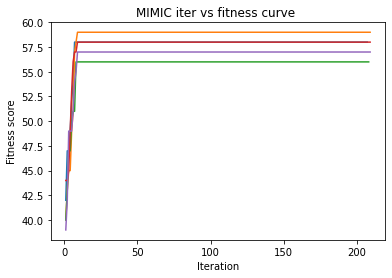

In [ ]:
seedsList = [7, 0, 1111111, 100, 88888888]
max_iters = 1000
max_attempts = 200
for sd in seedsList:
  start = timeit.default_timer()
  best_state_mimic, best_fitness_mimic, mimic_curve = mlrose_hiive.mimic(problem3, 
                                                                max_attempts = max_attempts, 
                                                                max_iters=max_iters, 
                                                                pop_size = 500,
                                                                curve=True, 
                                                                keep_pct=0.1, 
                                                                random_state= sd)
  end = timeit.default_timer()
  print(f'Best Fitness: {best_fitness_mimic}, Wall time: {end-start}s')
  title = "MIMIC iter vs fitness curve "
  plot_fitness_curve(mimic_curve,problem1,title)

In [ ]:
aveTime = (108.88301086299998 + 109.66352233900034 + 110.61923333200048 + 109.8808710809999 + 110.19756907899955)/5
print("MIMIC average converge time = "+ str(aveTime))
aveScore = (58.0 + 59.0 + 56.0 + 58.0 + 57.0)/5
print("MIMIC average fitness score = "+ str(aveScore))

MIMIC average converge time = 109.84884133880004
MIMIC average fitness score = 57.6


In [ ]:
rhc_ave_score = 32
sa_ave_score = 53.6
ga_ave_score = 59
mimic_ave_score = 57.6

rhc_ave_time = 0.022433560600075
sa_ave_time = 0.023131280400048127
ga_ave_time = 9.357784499600166
mimic_ave_time = 109.84884133880004

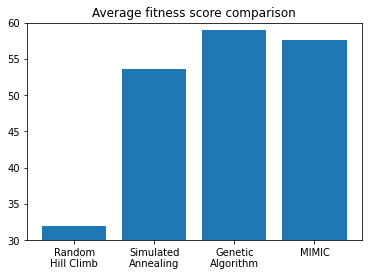

In [ ]:
algos = ('Random\nHill Climb', 'Simulated\nAnnealing', 'Genetic\nAlgorithm', 'MIMIC')
score = [32, 53.6, 59, 57.6]
plt.ylim((30, 60))

plt.bar(algos, score)
plt.title('Average fitness score comparison')

plt.show()

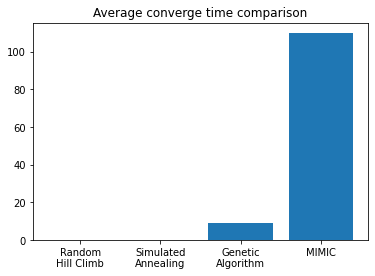

In [ ]:
algos = ('Random\nHill Climb', 'Simulated\nAnnealing', 'Genetic\nAlgorithm', 'MIMIC')
time = [0.022433560600075, 0.023131280400048127, 9.357784499600166, 109.84884133880004]

plt.bar(algos, time)
plt.title('Average converge time comparison')

plt.show()

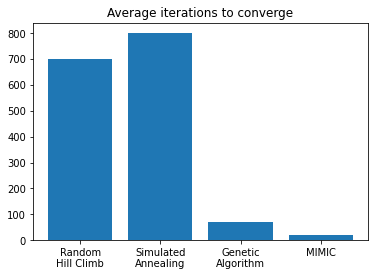

In [ ]:
algos = ('Random\nHill Climb', 'Simulated\nAnnealing', 'Genetic\nAlgorithm', 'MIMIC')
iter = [700, 800, 70, 20]

plt.bar(algos, iter)
plt.title('Average iterations to converge')

plt.show()